## GROUP ONE

1. APPIAH NHYIRABA PAA KWESI  - 2933320
2. MBIL ABDUL RAHMAN  - 2943220
3. QUAIDOO JOSHUA - 2947320
4. MENSAH DANIEL - 2943420
5. APPIANING JUDE NANA AHENKORAH - 2933520
6. OBENG CLINTON - 2945420
7. ACQUAAH ABA AKYENEBA - 2926520
8. KWEI RICHMOND MENSAH  - 2942520

## PREPARATION OF DATA

### 1. Calling python libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import KFold
from scipy import stats

# To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

### 2. Loading the data

Used the **na_values** parameter to specify how the missing values were represented in the CSV file.

The missing values are represented as NaN , nan_values = ['NaN']

In [10]:
raw_data = pd.read_csv(r"C:\Users\P K\Desktop\DATA FOR DESIGN PROJECT\New_Data_new.csv", na_values=['NaN']) # Read the CSV file into a DataFrame, treating 'NaN' as missing values
raw_data.head() # Display the first few rows of the DataFrame


,DEPTH(ft),ROP(ft/h),GR,"UCS, psi"
0,4507.0,35.003,23.500,11397.938
1,4507.5,35.188,23.521,11393.243
2,4509.0,35.611,24.030,11372.686
3,4509.5,35.712,24.151,11369.645
4,4510.0,35.792,24.259,11367.988


#### 3. Changing the column names for clarity

In [11]:
raw_data.columns=['DEPTH','ROP','GR','UCS']
raw_data.head()    # displaying the first 5 rows

,DEPTH,ROP,GR,UCS
0,4507.0,35.003,23.500,11397.938
1,4507.5,35.188,23.521,11393.243
2,4509.0,35.611,24.030,11372.686
3,4509.5,35.712,24.151,11369.645
4,4510.0,35.792,24.259,11367.988


# Data Processing

## Exploratory Data Analysis

### Checking for null values

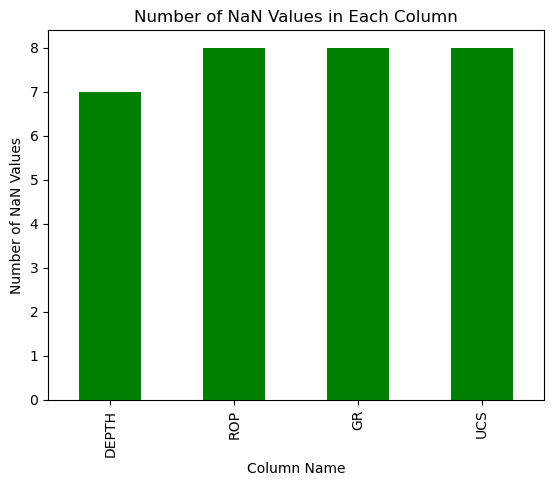

In [12]:
import matplotlib.pyplot as plt

nan_counts = raw_data.isnull().sum()

nan_counts.plot(kind='bar', color='green')  # Specify the color as 'green'
plt.title('Number of NaN Values in Each Column')
plt.xlabel('Column Name')
plt.ylabel('Number of NaN Values')
plt.show()


### DEALING WITH NaN VALUES USING LINEAR & CUBIC INTERPOLATION

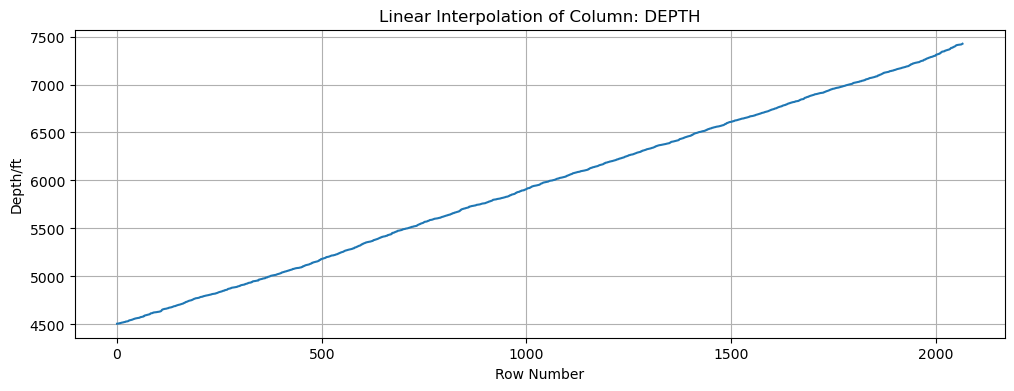

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming `raw_data` is a pandas DataFrame and `DEPTH` is the name of the column to interpolate
column_name1 = 'DEPTH'

raw_data[column_name1] = raw_data[column_name1].replace(0, np.nan)
raw_data[column_name1] = raw_data[column_name1].interpolate(method='linear')


plt.figure(figsize=(12,4))
plt.plot(raw_data.index, raw_data[column_name1])
plt.title('Linear Interpolation of Column: {}'.format(column_name1))
plt.xlabel('Row Number')
plt.ylabel('Depth/ft')
plt.grid(True)
plt.show()


##### Advantages of Cubic Interpolation
Suitable for data with smooth and continuous trends


Can accurately capture sudden jumps or discontinuities


Provides a more accurate fit than linear interpolation

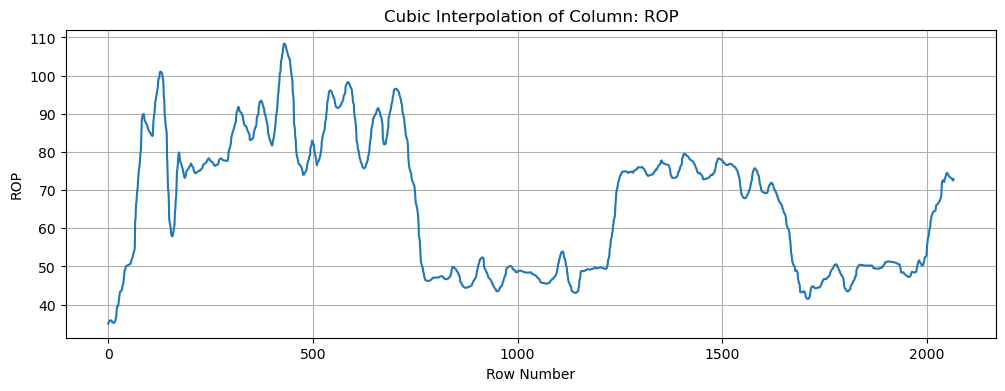

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming `raw_data` is the pandas DataFrame and `ROP` is the name of the column to interpolate
column_name2 = 'ROP'

raw_data[column_name2] = raw_data[column_name2].replace(0, np.nan)
raw_data[column_name2] = raw_data[column_name2].interpolate(method='cubic')

plt.figure(figsize=(12,4))
plt.plot(raw_data.index, raw_data[column_name2])
plt.title('Cubic Interpolation of Column: {}'.format(column_name2))
plt.xlabel('Row Number')
plt.ylabel('ROP')
plt.grid(True)
plt.show()


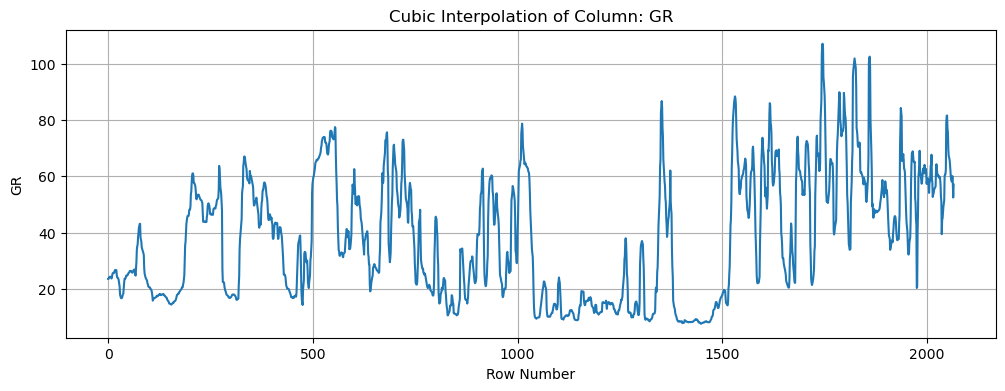

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming `raw_data` is a pandas DataFrame and `GR` is the name of the column to interpolate
column_name3 = 'GR'

raw_data[column_name3] = raw_data[column_name3].replace(0, np.nan)
raw_data[column_name3] = raw_data[column_name3].interpolate(method='cubic')


plt.figure(figsize=(12,4))
plt.plot(raw_data.index, raw_data[column_name3])
plt.title('Cubic Interpolation of Column: {}'.format(column_name3))
plt.xlabel('Row Number')
plt.ylabel('GR')
plt.grid(True)
plt.show()


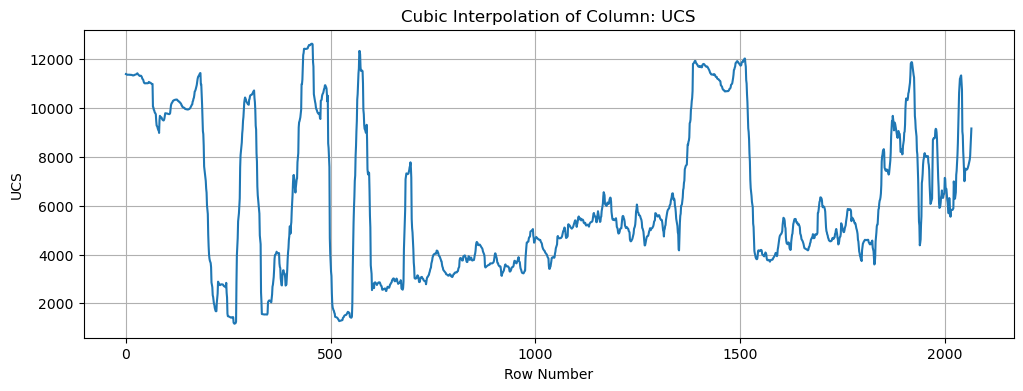

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming `raw_data` is a pandas DataFrame and `UCS` is the name of the column to interpolate
column_name4 = 'UCS'

raw_data[column_name4] = raw_data[column_name4].replace(0, np.nan)
raw_data[column_name4] = raw_data[column_name4].interpolate(method ='cubic')

plt.figure(figsize=(12,4))
plt.plot(raw_data.index, raw_data[column_name4])
plt.title('Cubic Interpolation of Column: {}'.format(column_name4))
plt.xlabel('Row Number')
plt.ylabel('UCS')
plt.grid(True)
plt.show()

### Confiriming that there are no NaN values in the new data frame


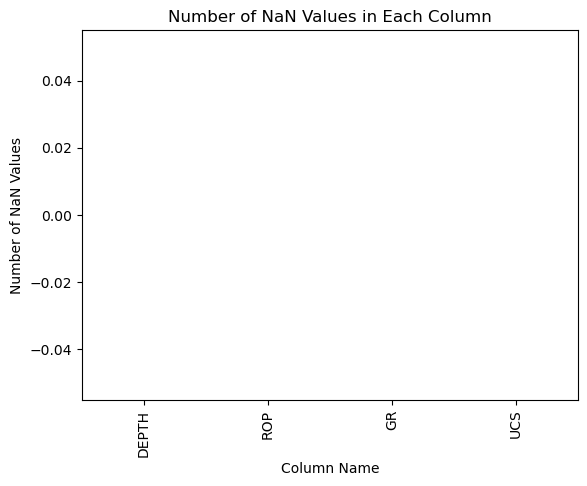

In [17]:
new_chart = raw_data.isnull().sum()
new_chart.plot(kind ='bar')
plt.title('Number of NaN Values in Each Column')
plt.xlabel('Column Name')
plt.ylabel('Number of NaN Values')
plt.show()

In [20]:
new_raw_data = raw_data[['DEPTH', 'ROP', 'GR','UCS']]

### DATA VISUALIZATION FOR  CLEANED  DATA 

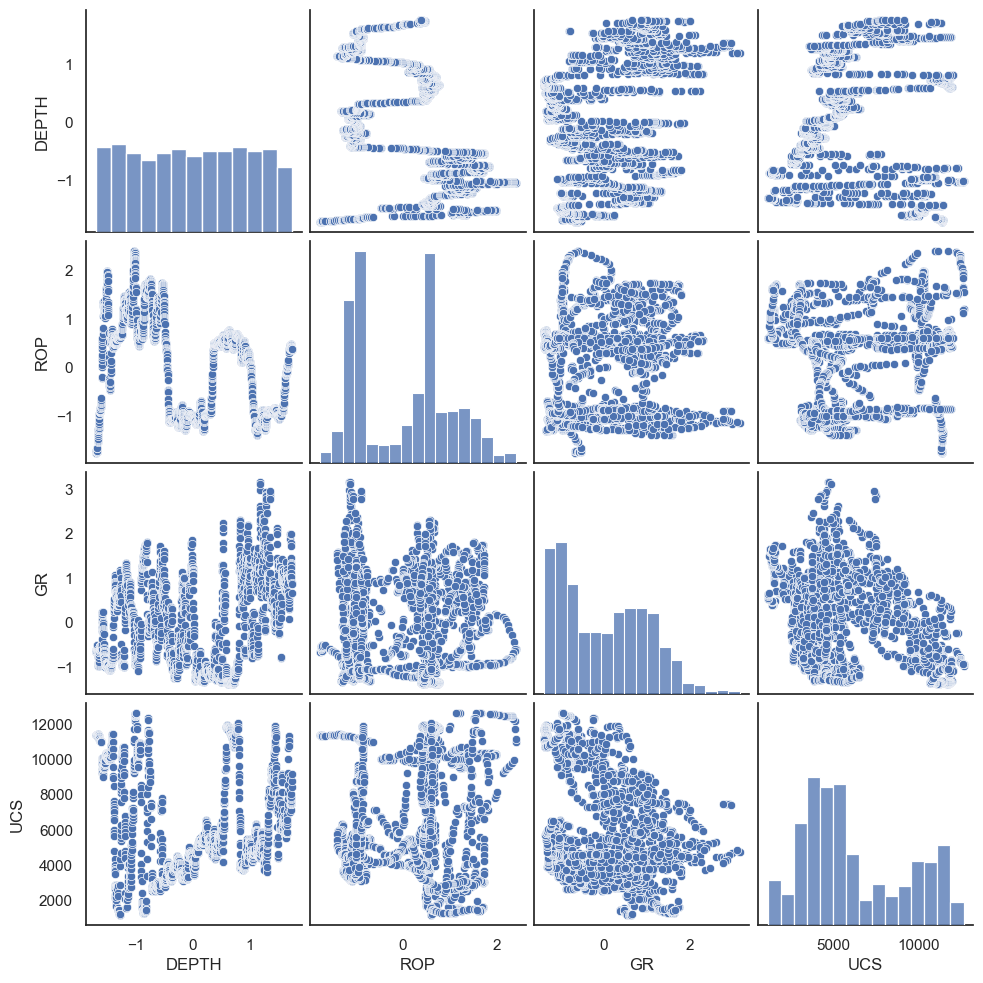

In [36]:
# Assuming new_raw_data is your DataFrame
ax = sns.pairplot(new_raw_data)
for ax in g.axes.flatten():
    ax.collections[0].set_edgecolor('green')  # Set edge color of scatter points
    ax.collections[0].set_facecolor('green')  # Set face color of scatter points

###  USING STANDARDIZATION FOR DATA SCALING

In [25]:
# Standardization

from sklearn.preprocessing import StandardScaler

# Define the features to standardize
scale_vars = ['DEPTH', 'ROP', 'GR']

# Create a StandardScaler object
scaler = StandardScaler()

# Standardize the specified features
new_raw_data[scale_vars] = scaler.fit_transform(new_raw_data[scale_vars])

# Print the standardized DataFrame
new_raw_data.head()

,DEPTH,ROP,GR,UCS
0,-1.712617,-1.772094,-0.656350,11397.938
1,-1.712022,-1.761548,-0.655393,11393.243
2,-1.710237,-1.737437,-0.632193,11372.686
3,-1.709642,-1.731680,-0.626677,11369.645
4,-1.709047,-1.727120,-0.621754,11367.988


# FEATURE SELECTION

###  USING SPEARMAN'S CORRELATION

In [26]:
c_m = new_raw_data[['DEPTH', 'ROP', 'GR','UCS']].corr(method= 'spearman') #spearman considers a non-linear correlation
c_m

,DEPTH,ROP,GR,UCS
DEPTH,1.000000,-0.422172,0.202014,0.106594
ROP,-0.422172,1.000000,0.048744,0.086236
GR,0.202014,0.048744,1.000000,-0.368014
UCS,0.106594,0.086236,-0.368014,1.000000


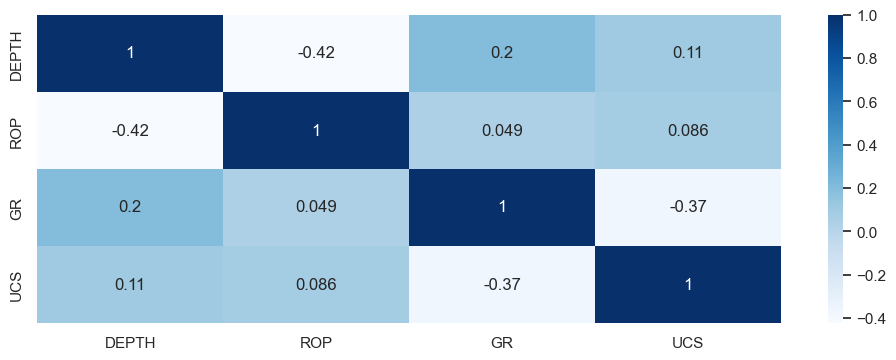

In [29]:
plt.figure(figsize=(12,4))
sns.set_theme(style="white")
heatmap = sns.heatmap(c_m, annot=True, cmap="Blues")

In [28]:
new_raw_data.describe().T  # STATISTICAL MEASURES OF NEW DATA FRAME

,count,mean,std,min,25%,50%,75%,max
DEPTH,2066.0,-2.378435e-16,1.000242,-1.712617,-0.882276,0.014111,0.861112,1.759879
ROP,2066.0,-8.998395e-17,1.000242,-1.772094,-0.980399,0.235466,0.667559,2.408613
GR,2066.0,-6.996662e-17,1.000242,-1.382320,-0.921564,-0.103658,0.823415,3.155911
UCS,2066.0,6.211039e+03,3056.598321,1164.482000,3886.413250,5264.042500,9040.642500,12640.002000


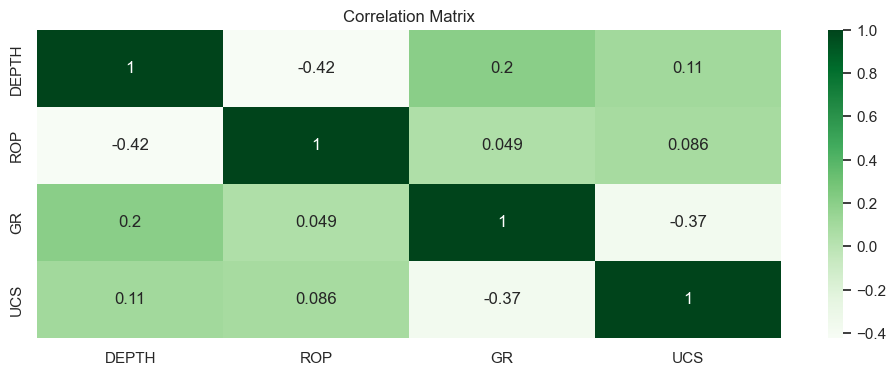

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 4))
sns.set_theme(style="white")

# Assuming c_m is your correlation matrix
heatmap = sns.heatmap(c_m, annot=True, cmap="Greens")  # Use "Greens" colormap

plt.title('Correlation Matrix')
plt.show()


In [29]:
new_raw_data.columns

Index(['DEPTH', 'ROP', 'GR', 'UCS'], dtype='object')

# K-fold cross validation, k= 5 

In [41]:
X = new_raw_data.drop('UCS', axis = 1)  # x-values
y = new_raw_data.UCS

# Initialize K-Fold cross-validator
kfold = KFold(n_splits =5, shuffle=True)





for train_index, val_index in kfold.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[val_index] #creates the training set and validation set for features
    y_train, y_test = y.iloc[train_index], y.iloc[val_index]  #creates training set and validation set for target variable

#i.loc is used to select rows by index
    
    print(X_train.shape) #shape for train data for features
    print(y_train.shape) #shape for training data for target
    print(X_test.shape)  #shape for test data for features
    print(y_test.shape)  #shape for test data for target



(1652, 3)
(1652,)
(414, 3)
(414,)
(1653, 3)
(1653,)
(413, 3)
(413,)
(1653, 3)
(1653,)
(413, 3)
(413,)
(1653, 3)
(1653,)
(413, 3)
(413,)
(1653, 3)
(1653,)
(413, 3)
(413,)


*** It means that the first iteration has 1652 samples in the training set with 3 features each, and 414 samples in the test set with 3 features each. The target variable(UCS)  for the training set has 1652 elements, and the target variable for the test set has 414 elements.***

## 1. DECISION TREE ALGORITHM

### DT EVALUATION METRICS FOR TRAINING DATA

In [42]:
regressor = DecisionTreeRegressor(random_state = 0)  #calling the decision tree algorithm 
regressor.fit(X_train, y_train) #train and obtain the equation from training data


y_train_pred = regressor.predict(X_train)

train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)


### DT- TEST DATA

In [43]:
y_test_pred = regressor.predict(X_test) #make predictions from test data
    
# Calculate evaluation metrics for test data
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

### EVALUATION METRICS PLOT FOR TRAIN AND TEST DATA - DT

### DT TRAIN PLOT

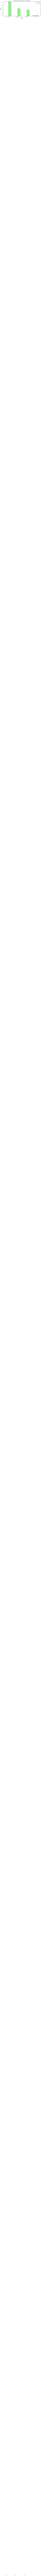

In [46]:
# Create DataFrames for train and test evaluation metrics
metrics_names = ['MSE', 'RMSE', 'MAE', 'R²']
train_metrics = [train_mse, train_rmse, train_mae, train_r2]
test_metrics = [test_mse, test_rmse, test_mae, test_r2]

#metrics_df = pd.DataFrame({
   ## 'Metric': metrics_names,
    #'Train': train_metrics,
   # 'Test': test_metrics
#})

# Plotting the metrics
plt.figure(figsize=(10, 4))
bar_width = 0.35
index = np.arange(len(metrics_names))

train_bars = plt.bar(index, train_metrics, bar_width, label='Train', color='skyblue')
test_bars = plt.bar(index + bar_width, test_metrics, bar_width, label='Test', color='lightgreen')

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Evaluation Metrics For Decision Tree Regressor')
plt.xticks(index + bar_width / 2, metrics_names)
plt.legend()

# Set y-axis to log scale
plt.yscale('log')

# Add text annotations
for i in range(len(metrics_names)):
    plt.text(index[i] - 0.05, train_metrics[i], str(round(train_metrics[i], 2)), fontsize=10, color='black', ha='center')
    plt.text(index[i] + bar_width - 0.05, test_metrics[i], str(round(test_metrics[i], 2)), fontsize=10, color='black', ha='center')



# Display the DataFrame
#metrics_df


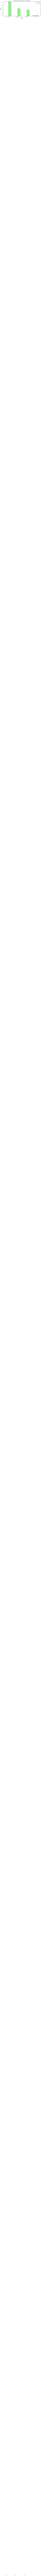

In [49]:
# Plotting the metrics
plt.figure(figsize=(10, 4))
bar_width = 0.35
index = np.arange(len(metrics_names))

train_bars = plt.bar(index, train_metrics, bar_width, label='Train', color='skyblue')
test_bars = plt.bar(index + bar_width, test_metrics, bar_width, label='Test', color='lightgreen')

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Evaluation Metrics For Decision Tree Regressor')
plt.xticks(index + bar_width / 2, metrics_names)
plt.legend()

# Set y-axis to log scale
plt.yscale('log')


Text(0.5, 1.0, 'Actuals vs Predicted Train Values')

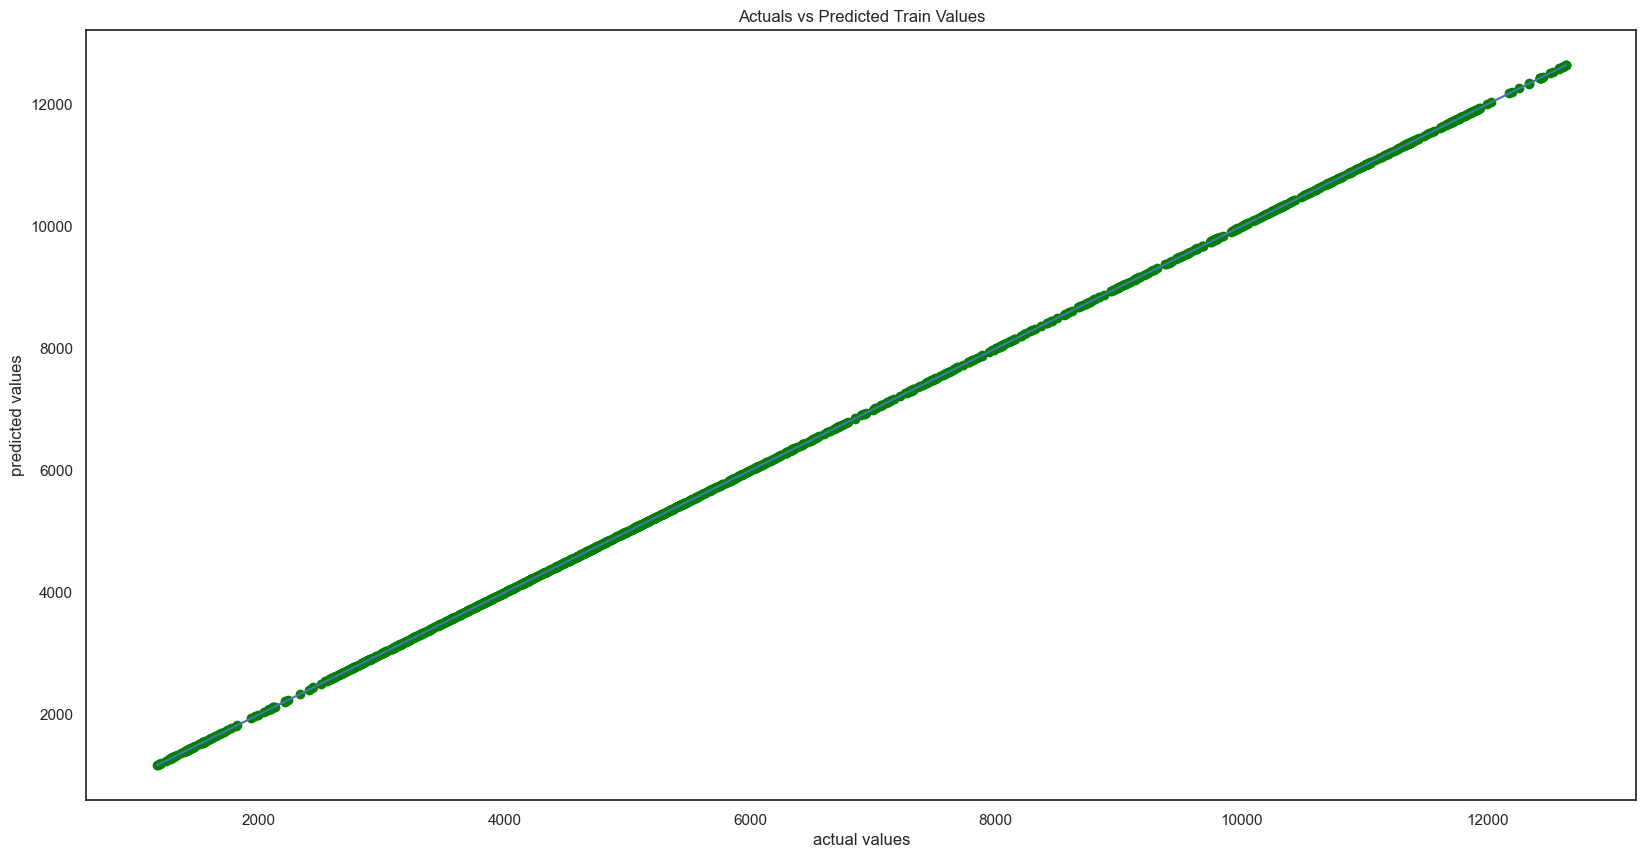

In [34]:
y_train_predict =regressor.predict(X_train) 

plt.figure(figsize=(20,10))

plt.scatter(y_train,y_train_predict, color='green') #plot the original test values on x-axis and predicted test values on y-axis
plt.plot([y_train.min(), y_train.max()],[y_train.min(), y_train.max()]) # this is not regression-just strain line
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.title('Actuals vs Predicted Train Values')

### DT TEST PLOT

Text(0.5, 1.0, 'Actuals vs Predicted Test Values')

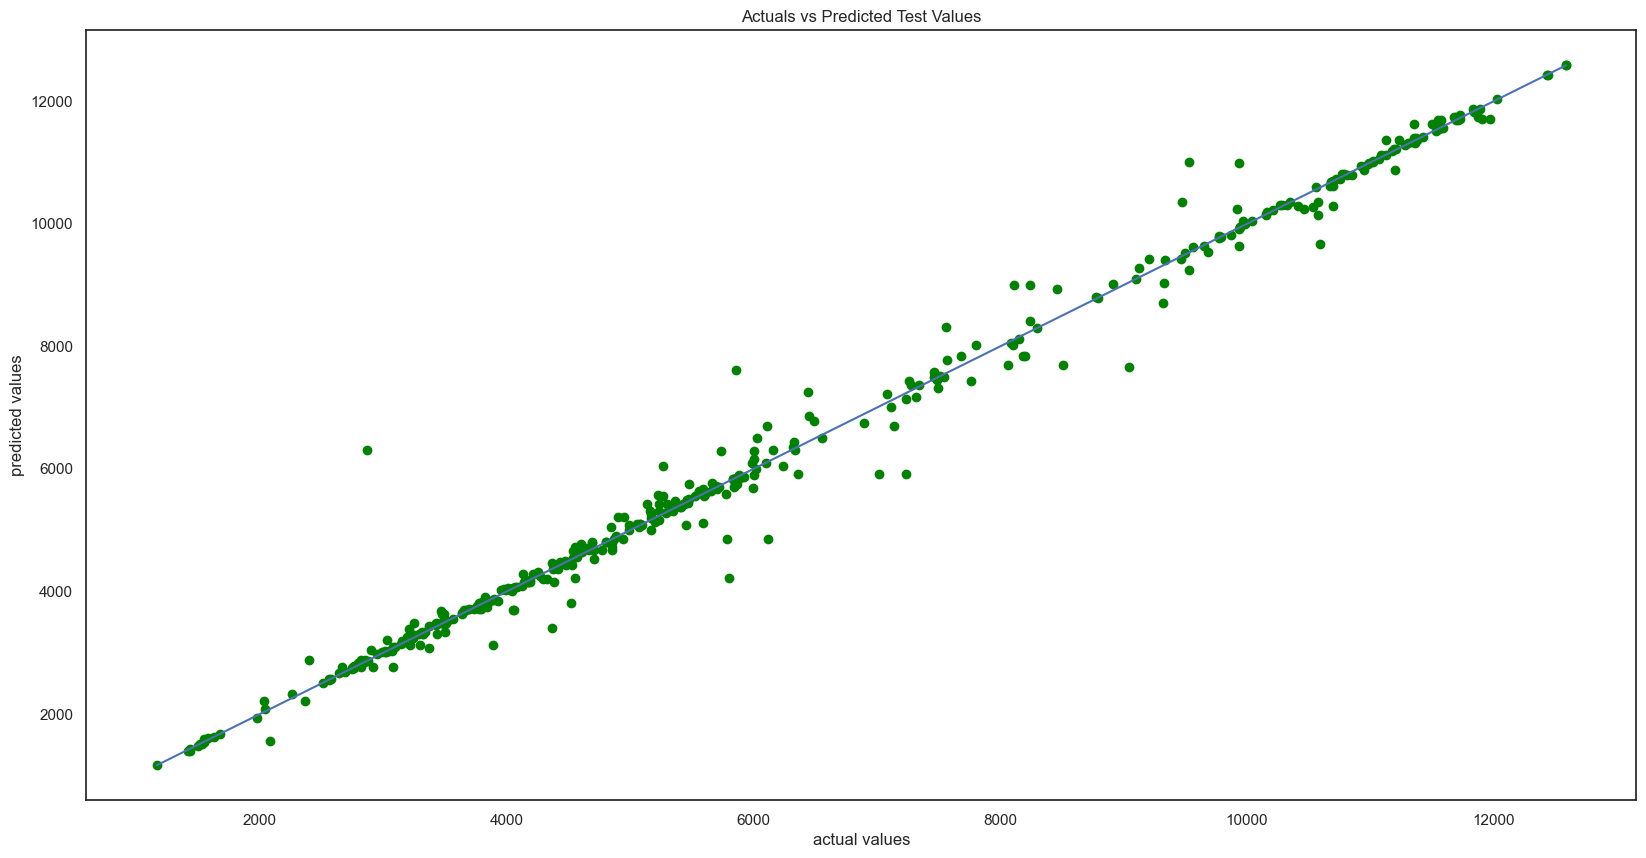

In [35]:
y_test_predict =regressor.predict(X_test) 

plt.figure(figsize=(20,10))

plt.scatter(y_test,y_test_predict, color='green') #plot the original test values on x-axis and predicted test values on y-axis
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()]) # this is not regression-just strain line
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.title('Actuals vs Predicted Test Values')


### RANDOM FOREST ALGORITHM

### RF EVALUATION METRICS FOR TRAINING DATA

In [54]:
rd_clf = RandomForestRegressor(random_state=42)
rd_clf.fit(X_train, y_train)

# Evaluation metrics on the training data
y_train_pred = rd_clf.predict(X_train)
rf_train_mse = mean_squared_error(y_train, y_train_pred)
rf_train_rmse = np.sqrt(rf_train_mse)
rf_train_mae = mean_absolute_error(y_train, y_train_pred)
rf_train_r2 = r2_score(y_train, y_train_pred)

### RF EVALUATION METRICS FOR TEST DATA

In [55]:
y_test_pred = rd_clf.predict(X_test)

rf_test_mse = mean_squared_error(y_test, y_test_pred)
rf_test_rmse = np.sqrt(rf_test_mse)
rf_test_mae = mean_absolute_error(y_test, y_test_pred)
rf_test_r2 = r2_score(y_test, y_test_pred)

### EVALUATION METRICS PLOT FOR TRAIN AND TEST DATA - RF

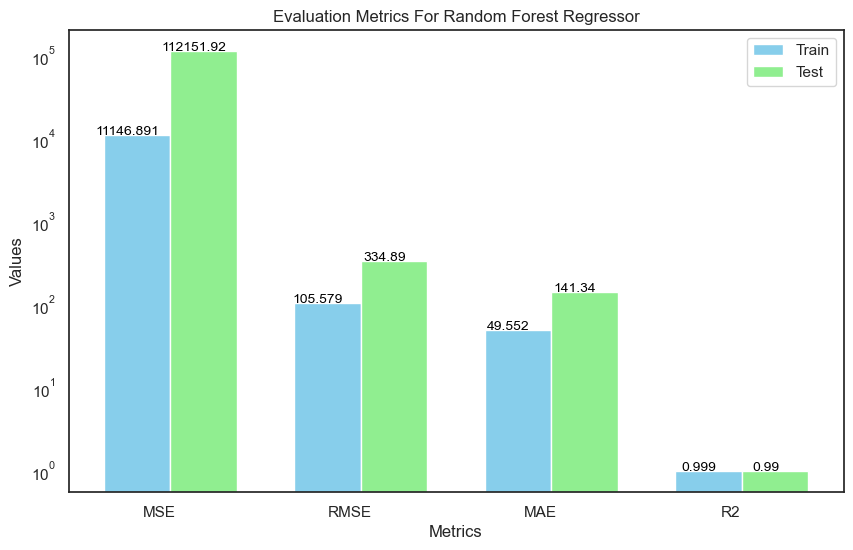

,Metric,Train,Test
0,MSE,11146.891128,112151.919776
1,RMSE,105.578838,334.890907
2,MAE,49.551579,141.339321
3,R2,0.998811,0.987775


In [56]:

# Create a DataFrame for evaluation metrics
metrics_df = pd.DataFrame({
    'Metric': ['MSE', 'RMSE', 'MAE', 'R2'],
    'Train': [rf_train_mse, rf_train_rmse, rf_train_mae, rf_train_r2],
    'Test': [rf_test_mse, rf_test_rmse, rf_test_mae, rf_test_r2]
})

# Plotting the evaluation metrics
plt.figure(figsize=(10, 6))

bar_width = 0.35
index = np.arange(len(metrics_df))

train_bars = plt.bar(index, metrics_df['Train'], bar_width, label='Train', color='skyblue')
test_bars = plt.bar(index + bar_width, metrics_df['Test'], bar_width, label='Test', color='lightgreen')

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Evaluation Metrics For Random Forest Regressor')
plt.xticks(index + bar_width / 3, metrics_df['Metric']) 
plt.legend()

# Set y-axis to log scale
plt.yscale('log')

# Add text annotations
for i in range(len(metrics_df)):
    plt.text(index[i] - 0.05, metrics_df['Train'][i], str(round(metrics_df['Train'][i], 3)), fontsize=10, color='black', ha='center')
    plt.text(index[i] + bar_width - 0.05, metrics_df['Test'][i], str(round(metrics_df['Test'][i], 2)), fontsize=10, color='black', ha='center')
    #round to 3.dp

plt.show()

# Display the DataFrame
metrics_df


## RF TRAIN PLOT

Text(0.5, 1.0, 'Actuals vs Predicted Train Values')

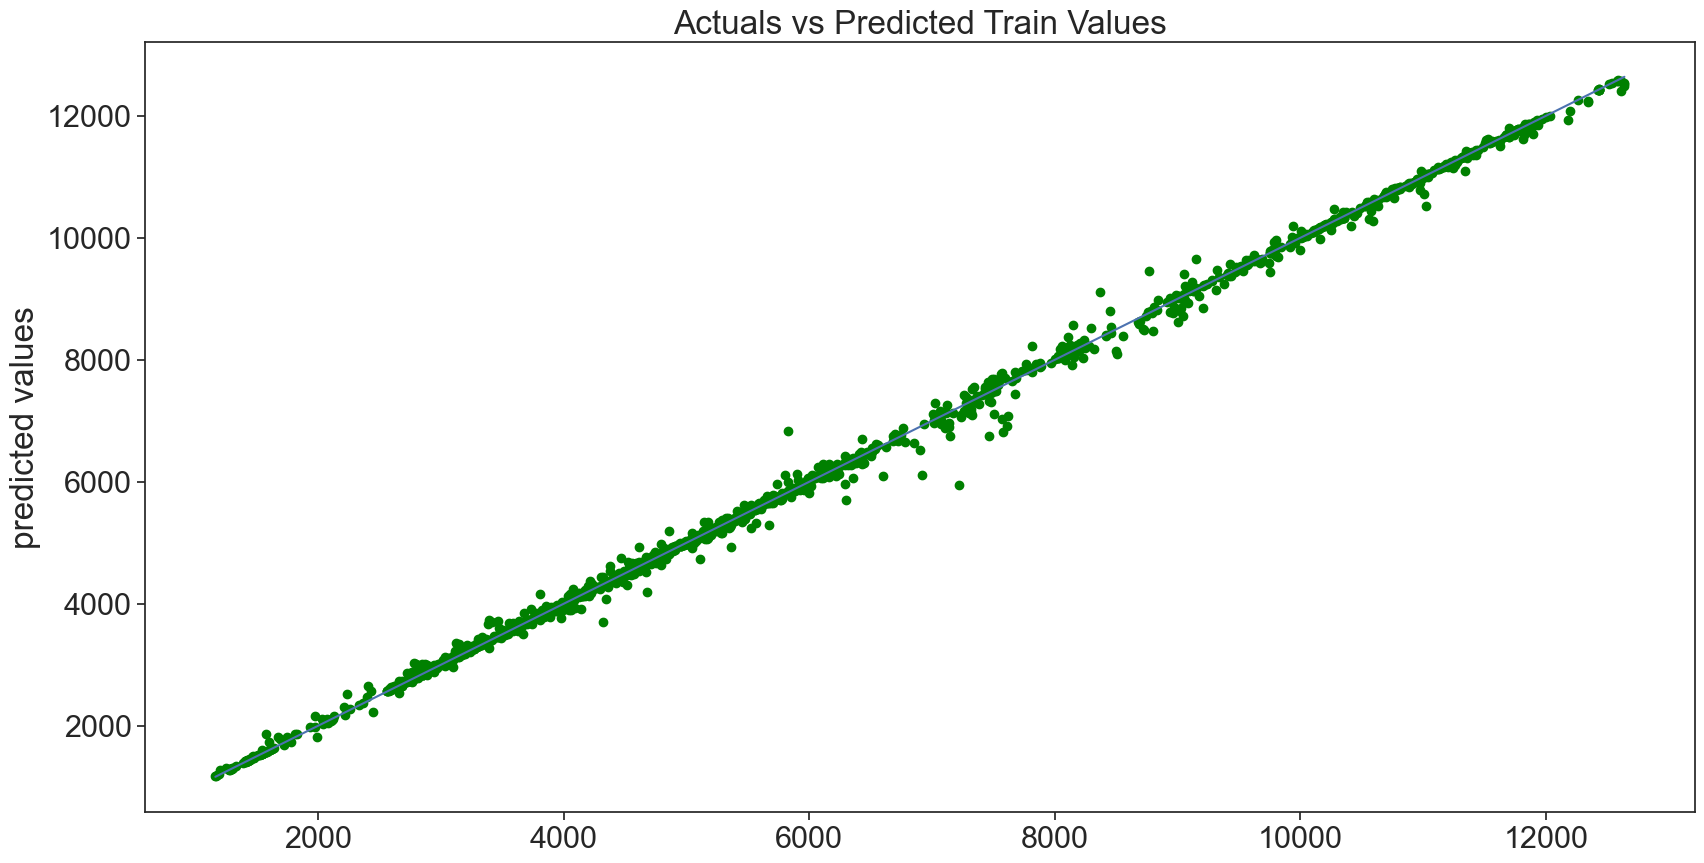

In [57]:
y_predTrainRF=rd_clf.predict(X_train)  


plt.figure(figsize=(20,10))
sns.set(font_scale = 2) 
sns.set_style("ticks")


plt.scatter(y_train,y_predTrainRF, color='green')
plt.plot([y_train.min(), y_train.max()],[y_train.min(), y_train.max()]) 
plt.ylabel('predicted values')
plt.title('Actuals vs Predicted Train Values')

### RF TEST PLOT

Text(0.5, 1.0, 'Actuals vs Predicted Test Values')

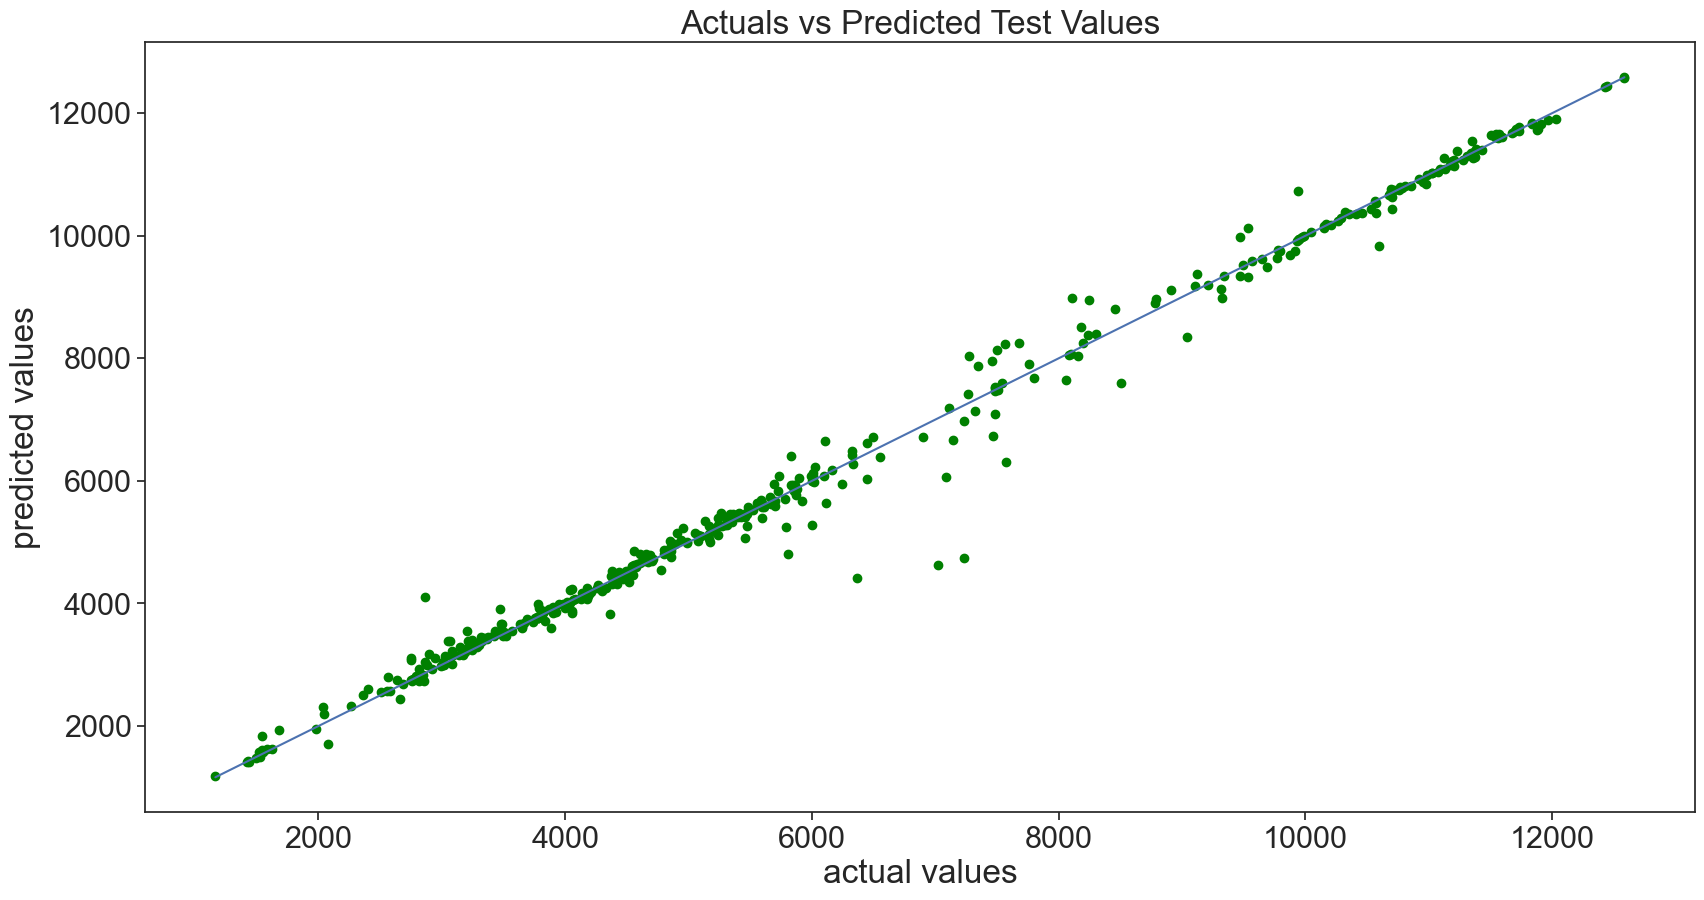

In [40]:
y_predTestRF=rd_clf.predict(X_test) 

plt.figure(figsize=(20,10))

plt.scatter(y_test,y_predTestRF, color='green')
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()])
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.title('Actuals vs Predicted Test Values')

### 3. LASSO REGRESSION 

### LASSO EVALUATION METRICS FOR TRAINING DATA

In [58]:
la = Lasso(random_state = 42)
la.fit(X_train,y_train)
    


y_predTrainla=la.predict(X_train)  #make predictions from train data  
train_mse = mean_squared_error(y_train, y_predTrainla)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_predTrainla)
train_r2 = r2_score(y_train, y_predTrainla)
    


### LASSO EVALUATION METRICS FOR TEST DATA

In [59]:
y_predTestla=la.predict(X_test) 
test_mse = mean_squared_error(y_test, y_predTestla)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_predTestla)
test_r2 = r2_score(y_test,y_predTestla)



### EVALUATION METRICS PLOT FOR TRAIN AND TEST DATA - LASSO

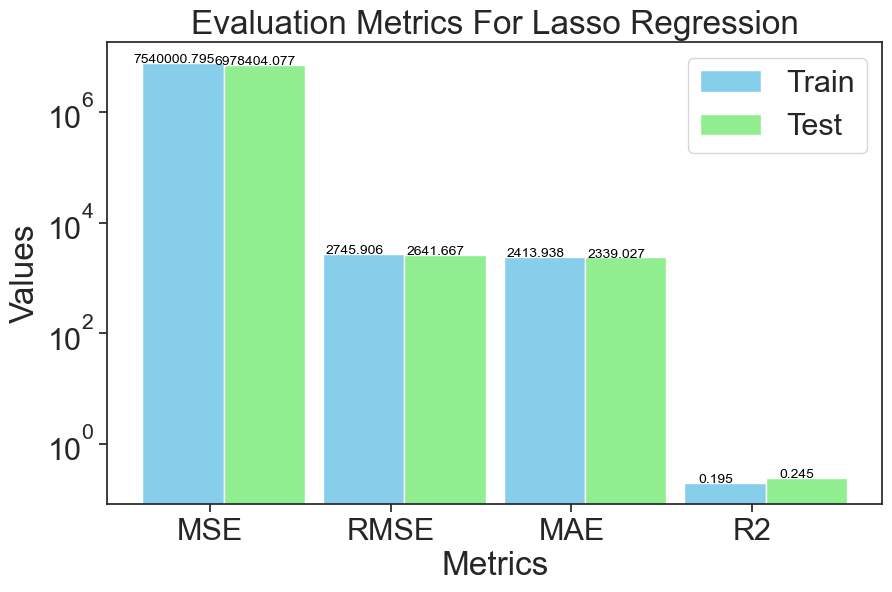

,Metric,Train,Test
0,MSE,7.540001e+06,6.978404e+06
1,RMSE,2.745906e+03,2.641667e+03
2,MAE,2.413938e+03,2.339027e+03
3,R2,1.945203e-01,2.453922e-01


In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train the Lasso regression model
la = Lasso(random_state=42)
la.fit(X_train, y_train)

# Predictions on the training data
y_pred_train_la = la.predict(X_train)
train_mse = mean_squared_error(y_train, y_pred_train_la)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_pred_train_la)
train_r2 = r2_score(y_train, y_pred_train_la)

# Predictions on the test data
y_pred_test_la = la.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred_test_la)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_pred_test_la)
test_r2 = r2_score(y_test, y_pred_test_la)

# Create a DataFrame for evaluation metrics
metrics_df_la = pd.DataFrame({
    'Metric': ['MSE', 'RMSE', 'MAE', 'R2'],
    'Train': [train_mse, train_rmse, train_mae, train_r2],
    'Test': [test_mse, test_rmse, test_mae, test_r2]
})

# Plotting the evaluation metrics
plt.figure(figsize=(10, 6))

bar_width = 0.45
index = np.arange(len(metrics_df_la))

train_bars = plt.bar(index, metrics_df_la['Train'], bar_width, label='Train', color='skyblue')
test_bars = plt.bar(index + bar_width, metrics_df_la['Test'], bar_width, label='Test', color='lightgreen')

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Evaluation Metrics For Lasso Regression')
plt.xticks(index + bar_width / 3, metrics_df_la['Metric'])
plt.legend()

# Set y-axis to log scale
plt.yscale('log')

# Add text annotations
for i in range(len(metrics_df_la)):
    plt.text(index[i] - 0.05, metrics_df_la['Train'][i], str(round(metrics_df_la['Train'][i], 3)), fontsize=10, color='black', ha='center')
    plt.text(index[i] + bar_width - 0.05, metrics_df_la['Test'][i], str(round(metrics_df_la['Test'][i], 3)), fontsize=10, color='black', ha='center')

plt.show()

# Display the DataFrame
metrics_df_la


#### LASSO TRAIN PLOT

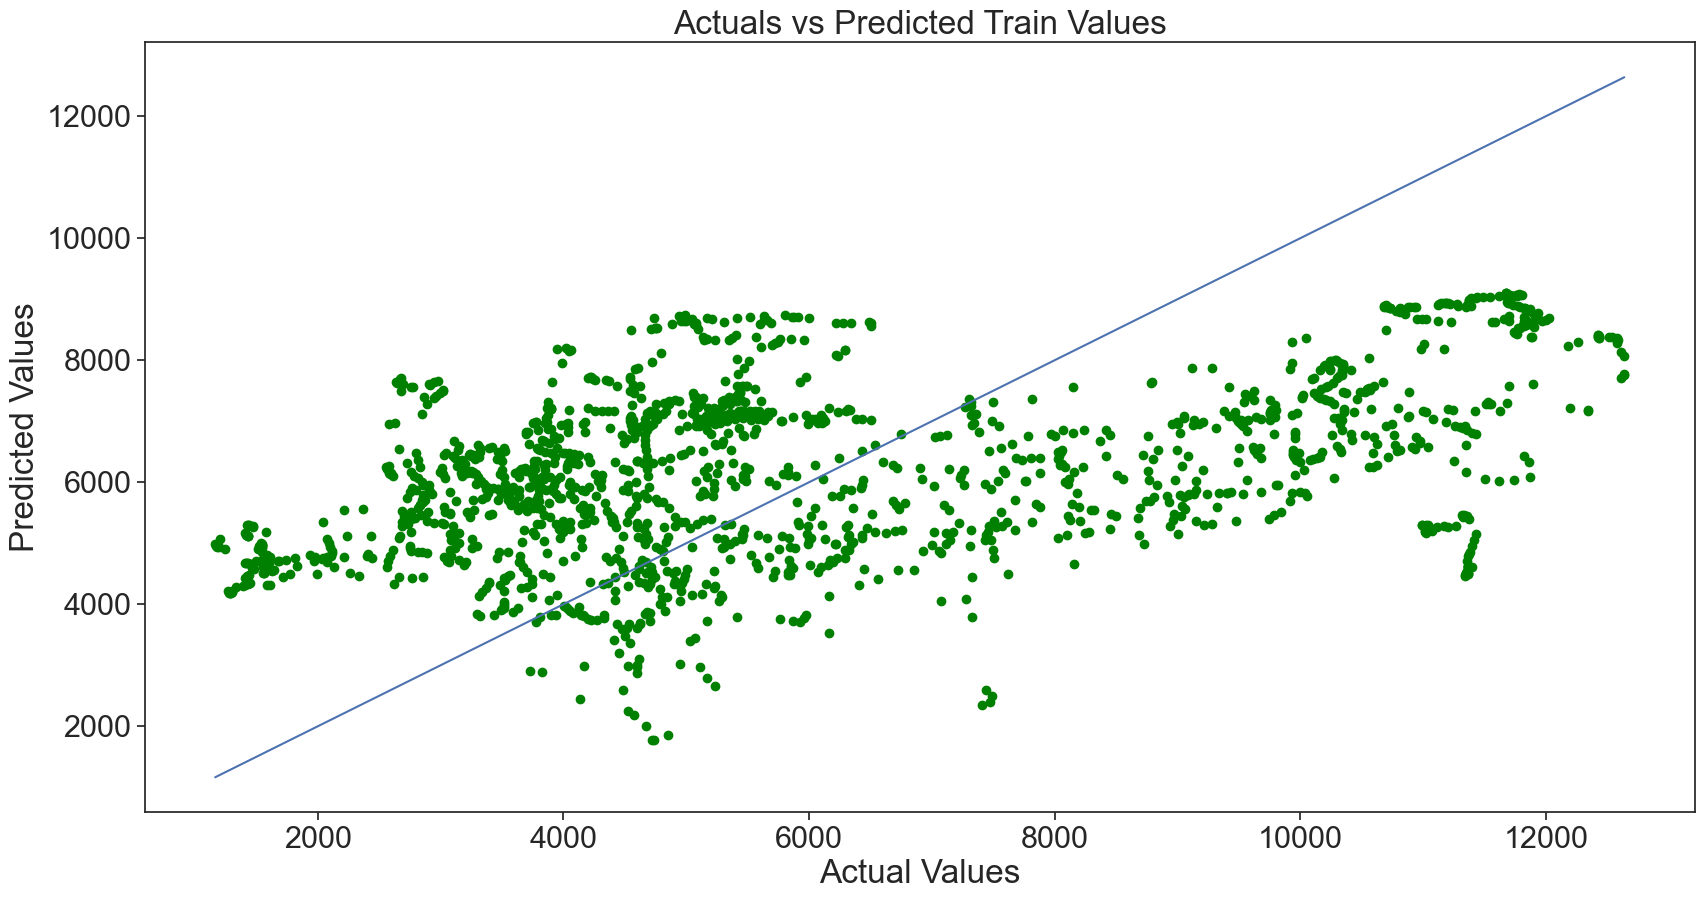

In [60]:
plt.figure(figsize=(20, 10))
sns.set(font_scale=2)
sns.set_style("ticks")
    
plt.scatter(y_train, y_predTrainla, color='green')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()])
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actuals vs Predicted Train Values')
plt.show()

###   LASSO TEST PLOT

Text(0.5, 1.0, 'Actual vs Predicted Test Values')

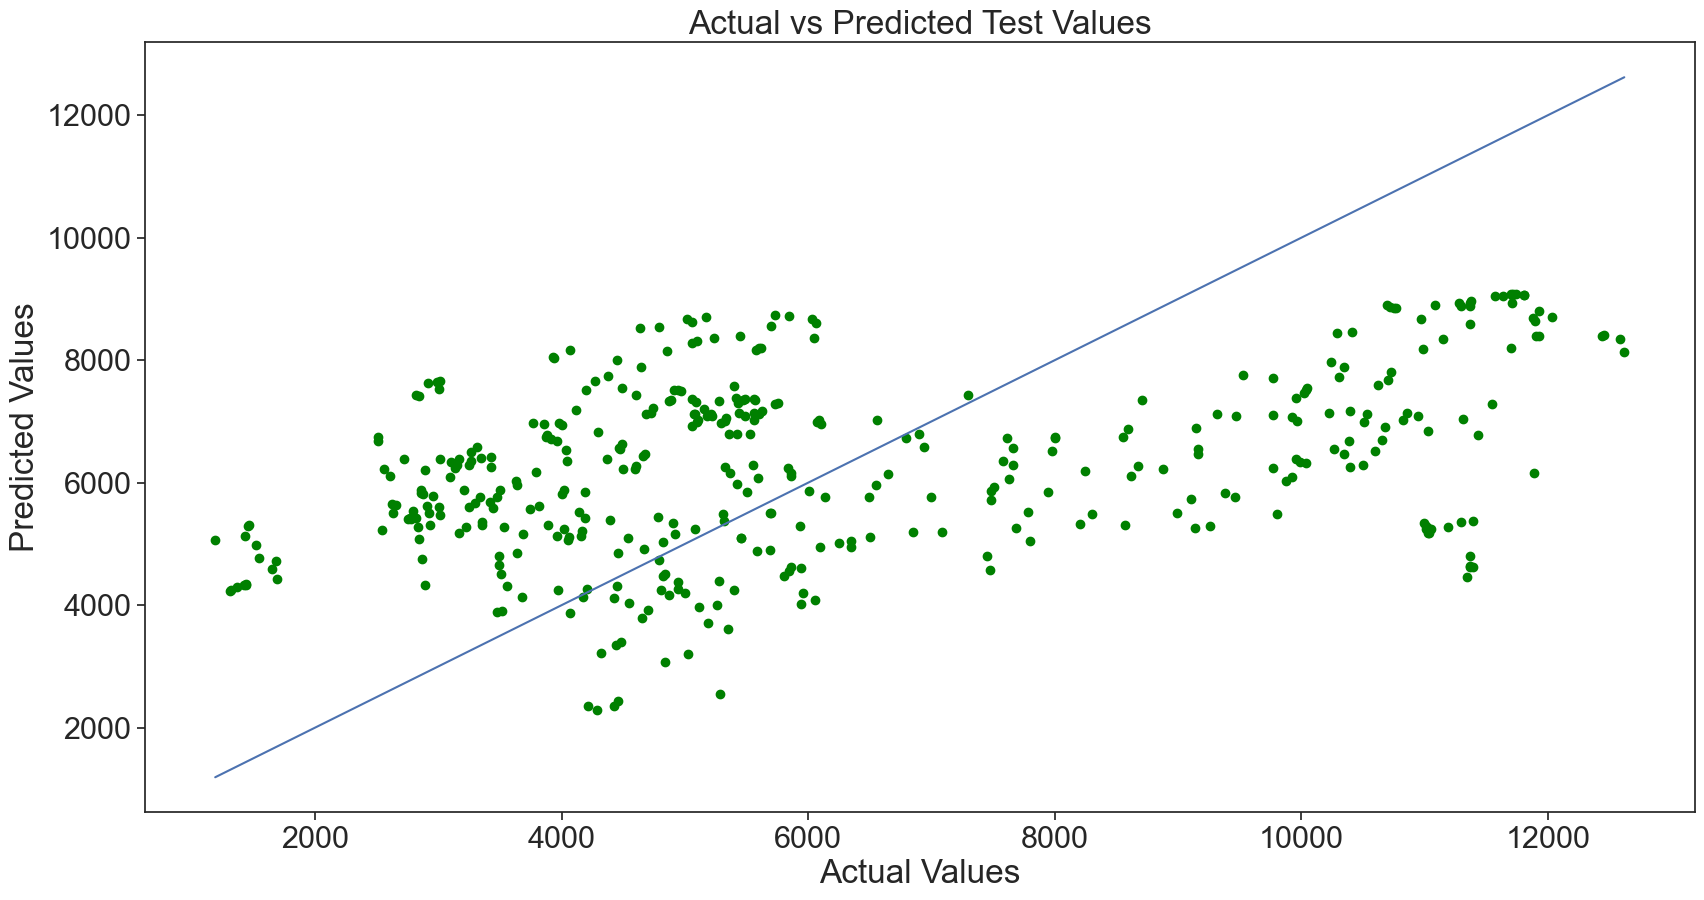

In [61]:
plt.figure(figsize=(20, 10))
plt.scatter(y_test,y_predTestla, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Test Values')


# SUMMARY

In [47]:
import pandas as pd

#DT
DecisionTree_MSE_TRAIN = 0
DecisionTree_MSE_TEST = 11068.49

DecisionTree_RMSE_TRAIN = 0
DecisionTree_RMSE_TEST = 105.21


DecisionTree_MAE_TRAIN = 0
DecisionTree_MAE_TEST = 168.8

DecisionTree_R2_TRAIN = 0
DecisionTree_R2_TEST = 0.98


#RF
RF_MSE_TRAIN = 11068.49
RF_MSE_TEST = 133000.32

RF_RMSE_TRAIN = 105.21
RF_RMSE_TEST = 365.92

RF_MAE_TRAIN = 51.28
RF_MAE_TEST = 155.25


RF_R2_TRAIN = 0.998
RF_R2_TEST = 0.986


#Lasso
Lasso_MSE_TRAIN = 7383632.68
Lasso_MSE_TEST = 7579549.2

Lasso_RMSE_TRAIN = 2717.28
Lasso_RMSE_TEST = 2753.01


Lasso_MAE_TRAIN = 2375.93
Lasso_MAE_TEST = 2417.7

Lasso_R2_TRAIN = 0.203
Lasso_R2_TEST = 0.214



# Create a dictionary containing the evaluation metrics
data = {
    'Model': ['Lasso', 'Random Forest', 'Decision Tree'],
    
    
    
    'MSE (Train Set)': [Lasso_MSE_TRAIN, RF_MSE_TRAIN, DecisionTree_MSE_TRAIN],
    'MSE (Test Set)': [Lasso_MSE_TEST, RF_MSE_TEST, DecisionTree_MSE_TEST],
    'RMSE (Train Set)': [Lasso_RMSE_TRAIN, RF_RMSE_TRAIN, DecisionTree_RMSE_TRAIN],
    'RMSE (Test Set)': [Lasso_RMSE_TEST, RF_RMSE_TEST, DecisionTree_RMSE_TEST],
    'MAE (Train Set)': [Lasso_MAE_TRAIN, RF_MAE_TRAIN, DecisionTree_MAE_TRAIN],
    'MAE (Test Set)': [Lasso_MAE_TEST, RF_MAE_TEST, DecisionTree_MAE_TEST],
    'R²  (Train Set)': [Lasso_R2_TRAIN, RF_R2_TRAIN, DecisionTree_R2_TRAIN],
    'R²  (Test Set)': [Lasso_R2_TEST, RF_R2_TEST, DecisionTree_R2_TEST],

}

# Create a DataFrame
df = pd.DataFrame(data)

# Display the +DataFrame
df


,Model,MSE (Train Set),MSE (Test Set),RMSE (Train Set),RMSE (Test Set),MAE (Train Set),MAE (Test Set),R² (Train Set),R² (Test Set)
0,Lasso,7383632.68,7579549.20,2717.28,2753.01,2375.93,2417.70,0.203,0.214
1,Random Forest,11068.49,133000.32,105.21,365.92,51.28,155.25,0.998,0.986
2,Decision Tree,0.00,11068.49,0.00,105.21,0.00,168.80,0.000,0.980
